In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eigenstrat_file = "/mnt/expressions/benjamin_vernot/faunal_mismapping/data/big-simulations/10_EIGENSTRAT-file/poseidon-with-faunal-inds-triallelic-removed-1240k-sites-only.eigenstratgeno"
eigenstrat_df = pd.read_csv(eigenstrat_file, names=["full_str"])
eigenstrat_df

,full_str
0,2222112222222122929211221222111222221211100112...
1,9999999999999999929999999999999999999999999999...
2,9999999999999999929999999999999999999999999999...
3,2112012211220122222122122222211211112212222222...
4,9999999999999999222999999999999999999999999999...
...,...
1217911,9999999999999999999999999999999999999999999999...
1217912,9999999999999999999999999999999999999999999999...
1217913,9999999999999999999999999999999999999999999999...
1217914,9999999999999999999999999999999999999999999999...


In [3]:
individual_file = "/mnt/expressions/benjamin_vernot/faunal_mismapping/data/big-simulations/10_EIGENSTRAT-file/poseidon-with-faunal-inds-triallelic-removed-1240k-sites-only.ind"
individual_df = pd.read_csv(individual_file, delimiter=" ", names=["name", "sex", "group"])
individual_df["index"] = individual_df.index
individual_df

,name,sex,group,index
0,HGDP01381,F,Adygei,0
1,HGDP01382,F,Adygei,1
2,HGDP01383,M,Adygei,2
3,HGDP01385,M,Adygei,3
4,HGDP01386,F,Adygei,4
...,...,...,...,...
1056,NA19210,M,Yoruba,1056
1057,NA19222,F,Yoruba,1057
1058,NA19223,M,Yoruba,1058
1059,NA19238,F,Yoruba,1059


In [4]:
animals_df = pd.DataFrame({animal: [f"{animal}-{number}" for number in range(1, 4)] for animal in ["sheep", "dog", "bear"]})
animals_df

,sheep,dog,bear
0,sheep-1,dog-1,bear-1
1,sheep-2,dog-2,bear-2
2,sheep-3,dog-3,bear-3


In [5]:
animals_indexe = pd.DataFrame({"animal": animals_df.values.reshape((9,))})
animals_indexe["index"] = pd.merge(left=animals_indexe[["animal"]], left_on="animal", right=individual_df, right_on="name", how="left")["index"]
animals_indexe

,animal,index
0,sheep-1,896
1,dog-1,221
2,bear-1,71
3,sheep-2,897
4,dog-2,222
5,bear-2,72
6,sheep-3,898
7,dog-3,223
8,bear-3,73


In [6]:
split_df = pd.DataFrame()
for animal, index in zip(animals_indexe["animal"], animals_indexe["index"]):
    split_df[animal] = eigenstrat_df["full_str"].str.slice(index, index+1)

split_df

,sheep-1,dog-1,bear-1,sheep-2,dog-2,bear-2,sheep-3,dog-3,bear-3
0,9,9,9,9,9,9,9,9,9
1,9,9,9,9,9,9,9,9,9
2,9,9,9,9,9,9,9,9,9
3,9,9,9,9,9,9,9,9,9
4,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...
1217911,9,9,9,9,9,9,9,9,9
1217912,9,9,9,9,9,9,9,9,9
1217913,9,9,9,9,9,9,9,9,9
1217914,9,9,9,9,9,9,9,9,9


In [7]:
neq9_df = split_df != "9"
neq9_df

,sheep-1,dog-1,bear-1,sheep-2,dog-2,bear-2,sheep-3,dog-3,bear-3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1217911,False,False,False,False,False,False,False,False,False
1217912,False,False,False,False,False,False,False,False,False
1217913,False,False,False,False,False,False,False,False,False
1217914,False,False,False,False,False,False,False,False,False


In [8]:
sum_species = pd.DataFrame()
for animal in animals_df.columns:
    col_names = animals_df[animal]
    sub_df = neq9_df[col_names]
    sum_species[animal] = sub_df.sum(axis=1)

sum_species

,sheep,dog,bear
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1217911,0,0,0
1217912,0,0,0
1217913,0,0,0
1217914,0,0,0


In [9]:
sum_all = pd.DataFrame({"sum_real": sum_species.sum(axis=1)})
sum_all

,sum_real
0,0
1,0
2,0
3,0
4,0
...,...
1217911,0
1217912,0
1217913,0
1217914,0


<AxesSubplot: xlabel='sum_real'>

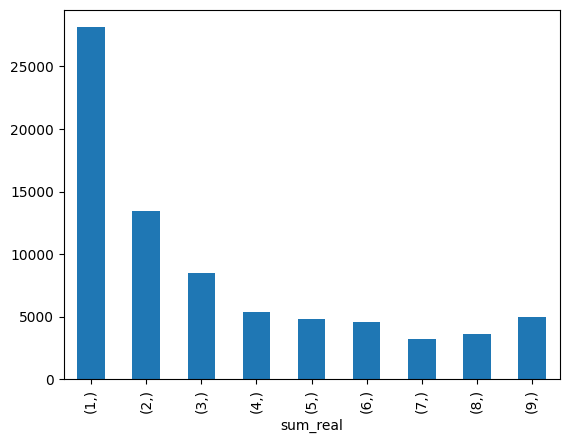

In [10]:
sum_all[sum_all["sum_real"]!=0].value_counts().sort_index().plot.bar()

In [25]:
perc_neq9 = (neq9_df.sum() / neq9_df.shape[0]).mean()
rand = np.random.choice([True, False], size=neq9_df.shape, p=[perc_neq9, 1-perc_neq9])

In [26]:
random_neq9_df = pd.DataFrame(rand, columns=neq9_df.columns)
# random_neq9_df

In [27]:
random_sum_species = pd.DataFrame()
for animal in animals_df.columns:
    col_names = animals_df[animal]
    sub_df = random_neq9_df[col_names]
    random_sum_species[animal] = sub_df.sum(axis=1)

# random_sum_species

In [36]:
sum_all["sum_fake"] = pd.DataFrame({"sum_fake": random_sum_species.sum(axis=1)})
sum_all

,sum_real,sum_fake
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
1217911,0,1
1217912,0,0
1217913,0,0
1217914,0,1


In [37]:
sum_plot_df = pd.DataFrame()
sum_plot_df["sum_real"] = sum_all["sum_real"].value_counts().sort_index()
sum_plot_df["sum_fake"] = sum_all["sum_fake"].value_counts().sort_index()
sum_plot_df

,sum_real,sum_fake
0,1141286,988700.0
1,28102,208285.0
2,13455,19837.0
3,8472,1053.0
4,5347,41.0
5,4820,NaN
6,4573,NaN
7,3239,NaN
8,3600,NaN
9,5022,NaN


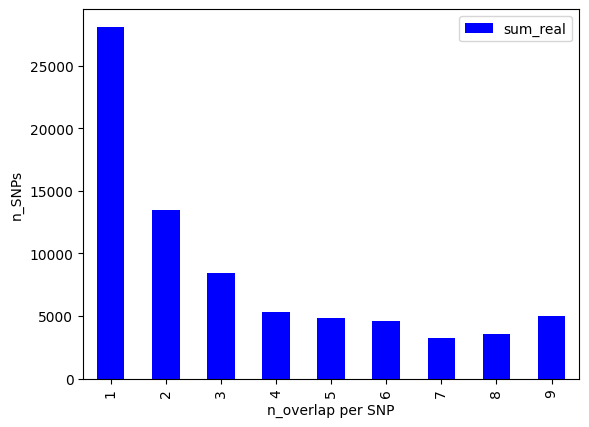

In [59]:
ax = sum_plot_df["sum_real"].iloc[1:].plot.bar(legend=True, color="blue")
ax.set_ylabel("n_SNPs")
ax.set_xlabel("n_overlap per SNP")
ax.get_figure().savefig("test2.png", bbox_inches="tight", dpi=300)

<AxesSubplot: >

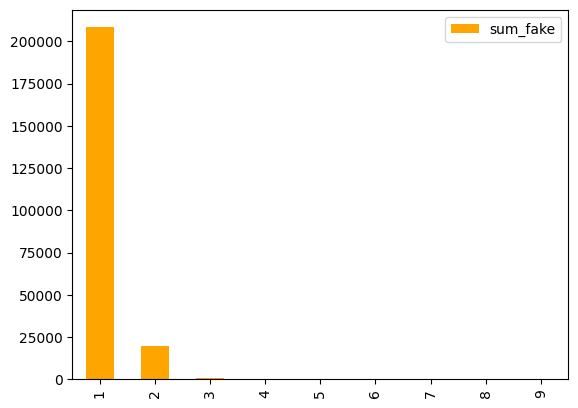

In [46]:
sum_plot_df["sum_fake"].iloc[1:].plot.bar(legend=True, color="orange")

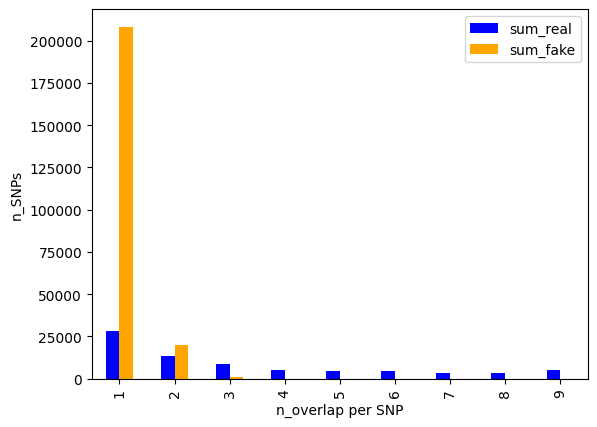

In [57]:
ax = sum_plot_df.iloc[1:].plot.bar(color=["blue", "orange"])
ax.set_ylabel("n_SNPs")
ax.set_xlabel("n_overlap per SNP")
ax.get_figure().savefig("test.png", bbox_inches="tight", dpi=300)

In [55]:
sum_all

,sum_real,sum_fake
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
1217911,0,1
1217912,0,0
1217913,0,0
1217914,0,1
